In [18]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Task 1:

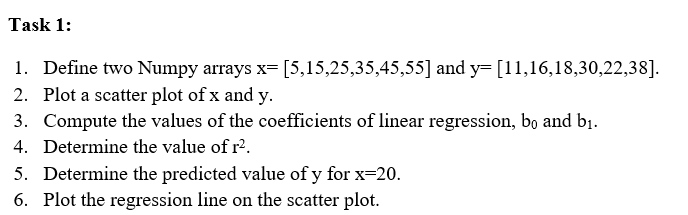

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Variable y')

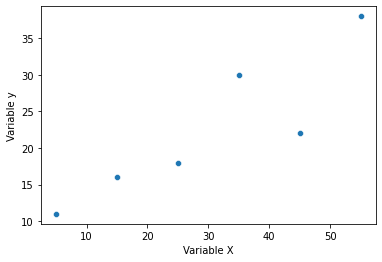

In [40]:
x= np.array([5, 15, 25, 35, 45, 55])
y= np.array([11, 16, 18, 30, 22, 38])
sns.scatterplot(x, y)

plt.xlabel('Variable X')
plt.ylabel('Variable y')

## Calculation of b1 and b0 values.

In [12]:
x_mean = np.mean(x)
y_mean = np.mean(y)

xy = x * y

xy_mean = np.mean(xy)
x_square = x**2
x_square_mean = np.mean(x_square)

# Using Formula given in reference PDF:
b1 = ((x_mean * y_mean) - np.mean(xy))/((x_mean)**2 - x_square_mean)
print('Slope b1 is = ', b1)


b0 = y_mean - b1 * x_mean
print('Intercept b0 is = ', b0)


Slope b1 is =  nan
Intercept b0 is =  nan


<ipython-input-12-90802575e296>:11: RuntimeWarning: invalid value encountered in double_scalars
  b1 = ((x_mean * y_mean) - np.mean(xy))/((x_mean)**2 - x_square_mean)


## Calculation of r square value.

In [6]:
# Formula:
y_pred = b1 * x + b0
error = y - y_pred
n = np.size(x)

se = (y - y_pred)**2

mse = (y - y_mean)**2

sse = np.sum(se)
ssr = np.sum(mse)

# Using Formula given in reference PDF:
r_sq = 1 - (sse/ssr)

print(se)

print(mse)

print('R square is', r_sq)

[ 0.08163265  0.32653061  4.59183673 26.44897959 57.32653061 13.79591837]
[132.25  42.25  20.25  56.25   0.25 240.25]
R square is 0.7913094027030956


Text(0, 0.5, 'y')

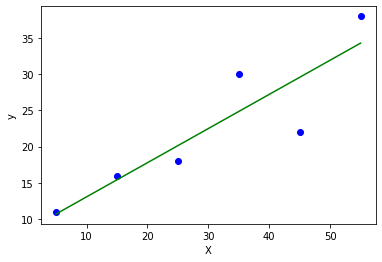

In [7]:
plt.scatter(x, y, color = 'blue')
plt.plot(x, y_pred, color = 'green') # Plotting the Regression line
plt.xlabel('X')
plt.ylabel('y')



In [14]:
# Formula:
x = np.array([20])
y_pred = b1 * x + b0

print(y_pred)

[nan]


# Task 2:

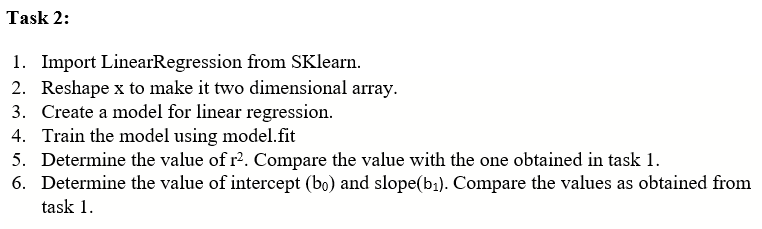

In [41]:
# import libraries
from sklearn.linear_model import LinearRegression

In [42]:
# Converting the X array initialized in Task 1 to a 2D array.
x = x.reshape((-1, 1))

print(x)
print()
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]

[11 16 18 30 22 38]


In [43]:
reg_model = LinearRegression()
reg_model.fit(x, y)

reg_model = LinearRegression().fit(x, y)

### Hence we see that the value of R Square obtained above closely resembles to that which we obtained in Task 1.



In [44]:
r_sq = reg_model.score(x, y)
print("Coefficient of determination (R Square) :", r_sq)

Coefficient of determination (R Square) : 0.7913094027030955


## Intercept and Slope values. 
### Again, these values closely resemble to those values which we obtained in Task 1 for intercept and Slope respectively.



In [ ]:
print("Intercept (b0) :", reg_model.intercept_)
print()
print("Slope (b1) :", reg_model.coef_)


Intercept (b0) : [ 8.75 11.5 ]

Slope (b1) : [[0.1375 0.1375]
 [0.275  0.275 ]]


# Task 3:

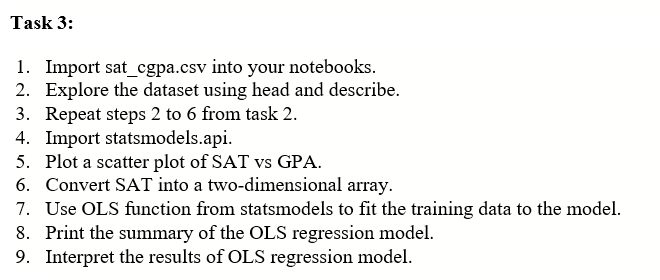

In [26]:
# import libraries
import statsmodels.api as sm

In [48]:
# Reading the File:
df = pd.read_csv("/content/sat_cgpa.csv")

In [28]:
# Size
df.size

168

In [29]:
# Shape
df.shape

(84, 2)

In [ ]:
# Data Types
df.dtypes

SAT      int64
GPA    float64
dtype: object

In [ ]:
df.head

<bound method NDFrame.head of      SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of      SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


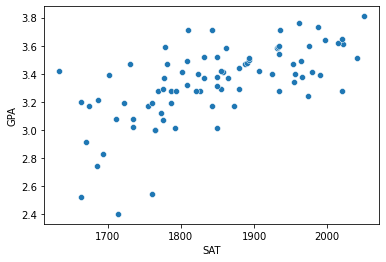

In [49]:
sat_data = df["SAT"]
gpa_data = df["GPA"]
sns.scatterplot(sat_data, gpa_data)

Slope b1 is =  0.0016556880500927249
Intercept b0 is =  0.27504029966044463
R Value =  0.40600391479679776


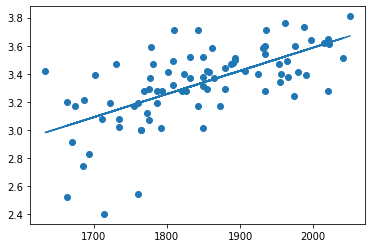

In [60]:
x = df["SAT"]
y = df["GPA"]

x_mean = np.mean(x)
y_mean = np.mean(y)

xy = x * y

xy_mean = np.mean(xy)
x_square = x**2
x_square_mean = np.mean(x_square)

# Using Formula given in reference PDF:
b1 = ((x_mean * y_mean) - np.mean(xy))/((x_mean)**2 - x_square_mean)
print('Slope b1 is = ', b1)


b0 = y_mean - b1 * x_mean
print('Intercept b0 is = ', b0)

r_sq = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - y_mean) ** 2))
print('R Value = ', r_sq)


plt.scatter(x, y)
plt.plot(x, y_pred)

plt.show()

In [61]:
x = df["SAT"].values.reshape(-1, 1)

In [67]:
z = sm.add_constant(x) # Adds one more column with name 'const' to the dataset with value 1. It is an alternative addition to the reshape function which is generally used.
model = sm.OLS(df["GPA"], z) # Using the OLS Function.
# In the above line, you can store df["GPA"] in variable y to make the model syntax look readable:
# It will look like this : model = sm.OLS(y, z)
results = model.fit()

In [68]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           7.20e-11
Time:                        05:24:59   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.5

# Interpretation of the result/summary generated:

The OLS regression model shows that there is a positive correlation between SAT scores and GPA. 

The coefficient for SAT (0.0017) is positive, meaning that an increase in SAT score leads to an increase in GPA. 

The R-squared value (0.406) indicates that 40.6% of the variance in GPA is explained by the variance in SAT scores.

We also notice that the R-squared value obtained in the OLS Regression Results summary as well as the value obtained in the cell above (for R Square) is the same. Hence, we verify that the R-squared value calculated using sklearn model and OLS Model Regresssion are the same.

Null Hypothesis is 1, Slope is not 0 as Probability = 0.000 is less than the Level of Significance (L.O.S) and hence we accept alternate hypothesis.

The greater the level of R, better the movel, i.e R should be closer to 1 than 1.